<a href="https://colab.research.google.com/github/kerry918/computer-vision-bootcamp/blob/kerry-bootcamp/UWARG_ComputerVisionBootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Load Data from Datasets

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


Check shape of data

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

Plot the image to check

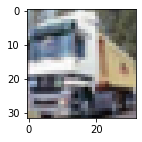

In [11]:
plt.figure(figsize = (15, 2))
plt.imshow(X_train[1])

Create a function to plot images

In [24]:
# Create a classes array for the labels
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
# Reshape y_train for easier access
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [15]:
def plot_image(X, y, index):
  plt.figure(figsize = (15, 2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

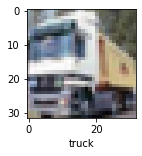

In [16]:
plot_image(X_train, y_train, 1)

Normalize X data

In [17]:
X_train = X_train / 255
X_test = X_test / 255

Create CNN Model

In [32]:
cnn = models.Sequential([
        #cnn 
        layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)), # Convolutional layer (detecting the features)
        layers.MaxPooling2D((2, 2)), # Max pooling layer
        layers.Dropout(0.3),

        layers.Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'), # Convolutional layer (detecting the features)
        layers.MaxPooling2D((2, 2)), # Max pooling layer
        layers.Dropout(0.3),

        #dense
        layers.Flatten(), # Flatten layer, shape is auto detected so no need to specify here (middle layer)
        # Deep layers
        layers.Dense(64, activation ='relu'), # 64 neurons
        layers.Dense(10, activation ='softmax') # 10 categories
      ])

In [33]:
cnn.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [34]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 157s 100ms/step - loss: 1.4688 - accuracy: 0.4742
Epoch 2/10
1563/1563 [==============================] - 155s 99ms/step - loss: 1.1331 - accuracy: 0.6047
Epoch 3/10
1563/1563 [==============================] - 155s 99ms/step - loss: 1.0234 - accuracy: 0.6417
Epoch 4/10
1563/1563 [==============================] - 155s 99ms/step - loss: 0.9540 - accuracy: 0.6666
Epoch 5/10
1563/1563 [==============================] - 154s 99ms/step - loss: 0.9058 - accuracy: 0.6841
Epoch 6/10
1563/1563 [==============================] - 155s 99ms/step - loss: 0.8513 - accuracy: 0.7036
Epoch 7/10
1563/1563 [==============================] - 158s 101ms/step - loss: 0.8216 - accuracy: 0.7130
Epoch 8/10
1563/1563 [==============================] - 153s 98ms/step - loss: 0.7872 - accuracy: 0.7261
Epoch 9/10
1563/1563 [==============================] - 153s 98ms/step - loss: 0.7628 - accuracy: 0.7325
Epoch 10/10
1563/1563 [==============================

In [35]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 9s 27ms/step - loss: 0.8283 - accuracy: 0.7154


[0.8283365964889526, 0.715399980545044]

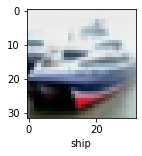

In [25]:
plot_image(X_test, y_test, 1)

In [36]:
y_pred = cnn.predict(X_test)
y_pred[:5]
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [37]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [30]:
classes[y_classes[1]]

'ship'